### Student Information
Name: 李享 Louis

Student ID: 111062699

GitHub ID:ShahonG

Kaggle name:❽❼🌚吳冠緯我大嫂🌚❽❼

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

## Lab2 - Master part

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


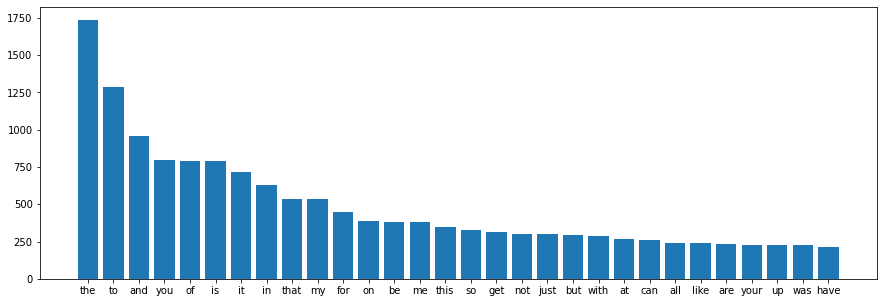

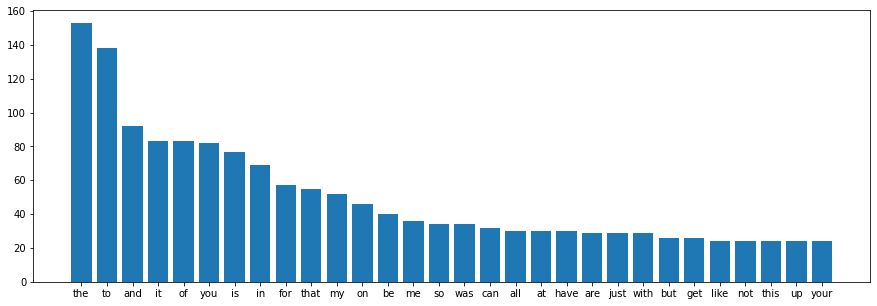

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=30)
train_cv30 = cv.fit_transform(train_df.text)
test_cv30 = cv.fit_transform(test_df.text)

# train
train_freq = [ sum(i) for i in train_cv30.toarray().T ]
train_indexes = sorted(range(len(train_freq)), key=lambda k: train_freq[k], reverse=True)
train_rank = np.array(cv.get_feature_names())[train_indexes]

# test
test_freq = [ sum(i) for i in test_cv30.toarray().T ]
test_indexes = sorted(range(len(test_freq)), key=lambda k: test_freq[k], reverse=True)
test_rank = np.array(cv.get_feature_names())[test_indexes]


import matplotlib.pyplot as plt
# train
plt.figure(figsize=(15, 5))
plt.bar(train_rank, sorted(train_freq, reverse=True))
plt.show()

# test
plt.figure(figsize=(15, 5))
plt.bar(test_rank, sorted(test_freq, reverse=True))
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_1000 = TfidfVectorizer(max_features=1000) 

# apply analyzer to training data
train_data_tfidf_features_1000 = tfidf_1000.fit_transform(train_df.text)

print(np.array(tfidf_1000.get_feature_names())[100:110])

['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Answer here
Confusion matrix can see the result of predict true or false, in this case, we can clearly know which emotion most misunderstood,
the triangle element means predict success, if it is most obvious in each row or column, then the model have good result, other elements means predict wrong.

Suppose anger means positive and fear means negative and build another confusion matrix, we can get more information such as FP(False Positive) and FN(False Negative) in this matrix, which easy to calculate tolerance rate and tune the model.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
Naive Bayes get 0.76 on training dataset and 0.65 on testing dataset.
DecisionTreeClassifier get 0.99 on training dataset and 0.68 on testing dataset.

You can clearly know that DecisionTreeClassifier get good grades on training dataset, but they get nearly grade on test dataset, which means DecisionTreeClassifier may encounter serious Overfitting problem, Naive Bayes may have overfitting too but not that serious.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

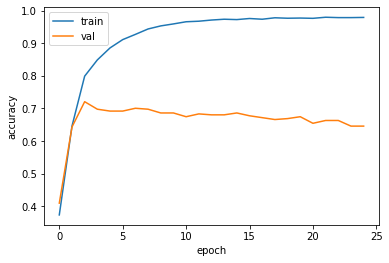

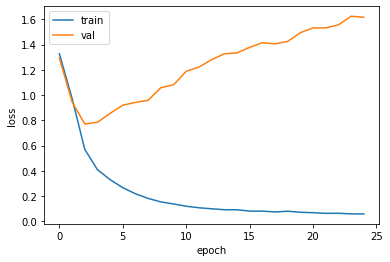

In [ ]:
# Answer here
# as the picture show, big different between Train accuracy and Val accuracy, which means serious overfitting happen here, so as train loss and validation loss

# print(history.history.keys())
# > dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()



---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

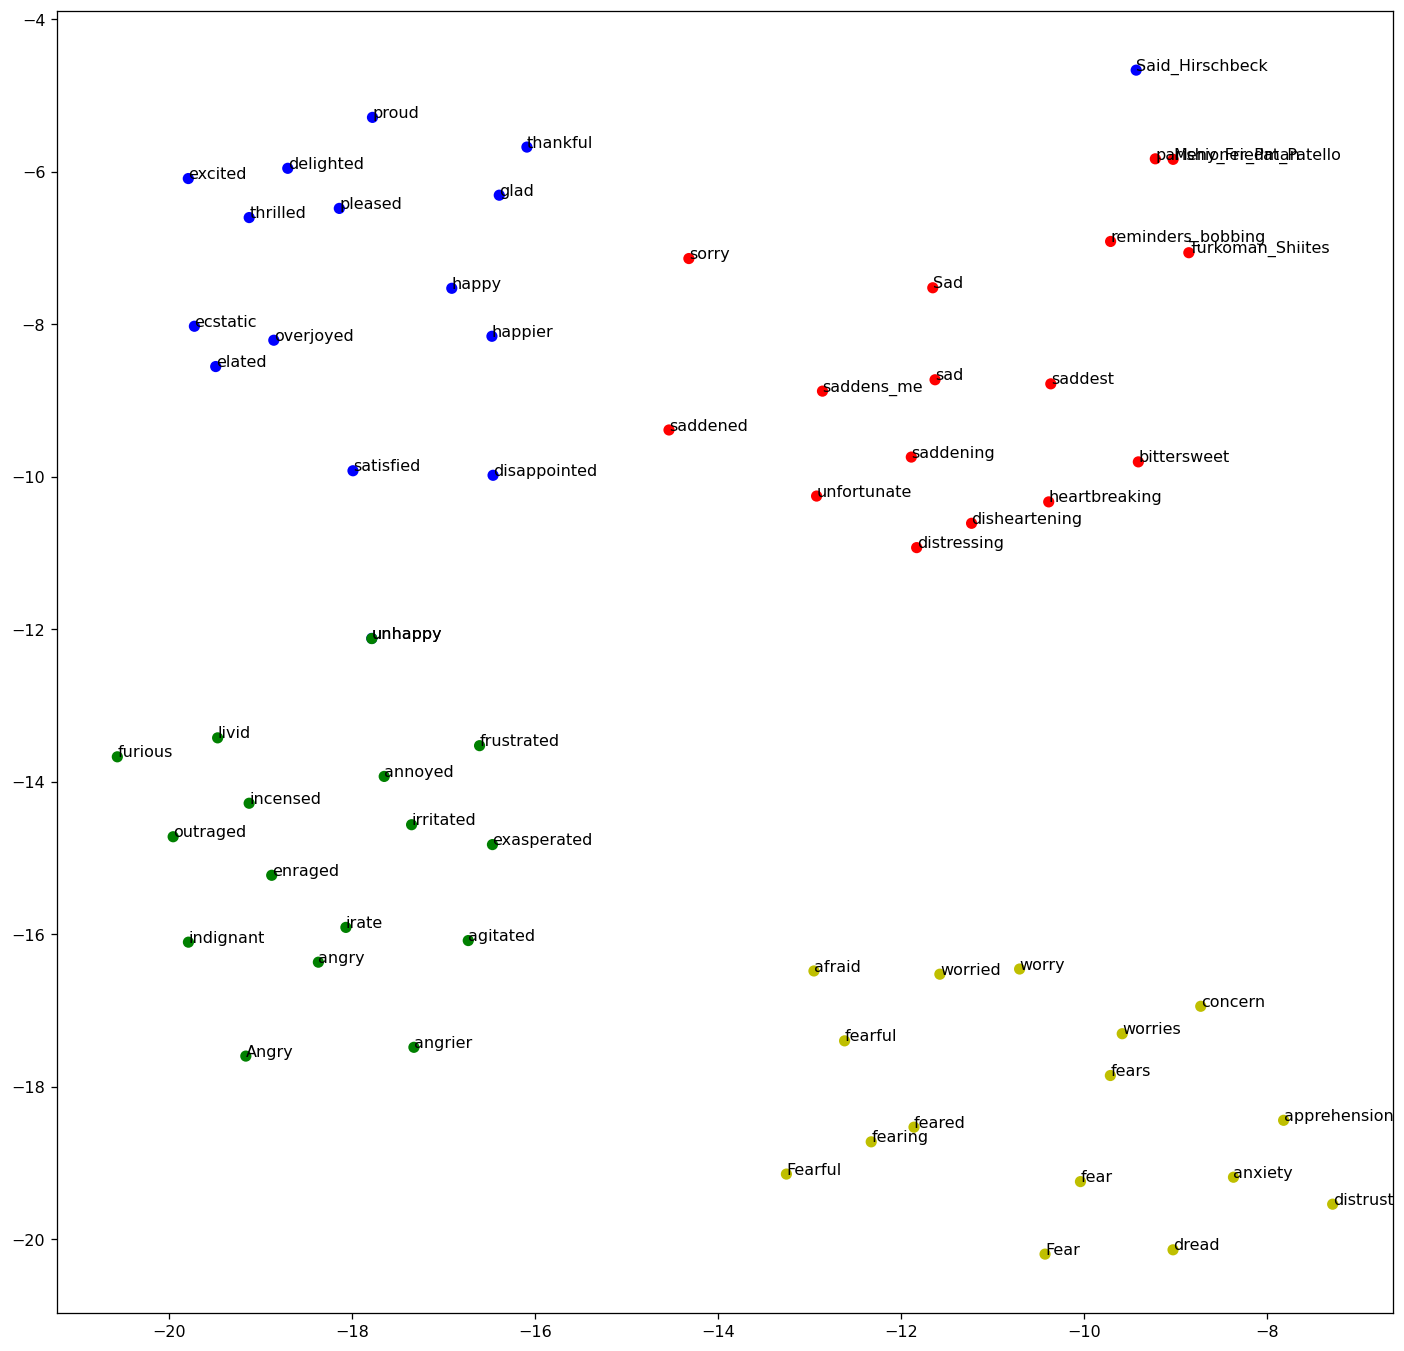

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
# most relation words of key word
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

target_words = happy_words + angry_words + sad_words + fear_words
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(15, 15), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [ ]:
# Answer here
from sklearn.naive_bayes import GaussianNB

# DecisionTreeClassifier can accept sparse matrix as input, but naive_bayes can't
# so transfor to ndarray first
X_NB_train = BOW_500.transform(train_df.text).toarray()
y_NB_train = train_df['emotion']

X_NB_test = BOW_500.transform(test_df.text).toarray()
y_NB_test = test_df['emotion']

NB_model = GaussianNB()
NB_model = NB_model.fit(X_NB_train, y_NB_train)

y_NB_train_pred = NB_model.predict(X_NB_train) # compare result with y_NB_train
y_NB_test_pred = NB_model.predict(X_NB_test)   # compare result with y_NB_test

acc_NB_train = accuracy_score(y_true=y_NB_train, y_pred=y_NB_train_pred)
acc_NB_test = accuracy_score(y_true=y_NB_test, y_pred=y_NB_test_pred)

print('training accuracy: {}'.format(round(acc_NB_train, 2)))
print('testing accuracy: {}'.format(round(acc_NB_test, 2)))

training accuracy: 0.76
testing accuracy: 0.65


## 1. Data Preprocessing

In [1]:
### Begin Assignment Here
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

import torch

import numpy as np
import pandas as pd

path = 'dm2022-isa5810-lab2-homework/'
ori_tweets_data = pd.read_json(path + 'tweets_DM.json', lines=True)
ori_tweets_label = pd.read_csv(path + 'emotion.csv')
tweet_train_predict_split = pd.read_csv(path + 'data_identification.csv')

In [2]:
# '_index' and '_type' are all the same in this dataset, so drop it.

tweets_data = ori_tweets_data.drop(columns=['_index', '_type'])
tweets_label = ori_tweets_label.drop(columns=['tweet_id'])

In [3]:
import re

score, hashtags, tweet_id, text = [], [], [], []
score = pd.DataFrame({ 'score': tweets_data['_score'].values.tolist() })

for idx, d in enumerate(tweets_data['_source'].values):
    if len(d['tweet']['hashtags']) == 0:
        hashtags.append(None)
    else:
        hashtags.append(d['tweet']['hashtags'])
    tweet_id.append(d['tweet']['tweet_id'])
    text.append(re.sub(r'[^\w\s]', '', d['tweet']['text']))

hashtags = pd.DataFrame({'hashtags': hashtags})
tweet_id = pd.DataFrame(tweet_id, columns=['tweet_id'])
text = pd.DataFrame(text, columns=['text'])

tweets_data = pd.concat([tweets_data, hashtags, tweet_id, text], axis=1)
tweets_data = tweets_data.drop(columns=['_source'])
# tweets_data[:5]

In [4]:
# tweets_data.to_csv(path + 'split_tweet_data.csv', index=False)
split_data = pd.read_csv(path + 'split_tweet_data.csv', lineterminator='\n')

In [5]:
emotions = pd.read_csv(path + 'emotion.csv')

# set(emotions['emotion'])

sadness = emotions.loc[emotions['emotion'] == 'sadness']
disgust = emotions.loc[emotions['emotion'] == 'disgust']
anticipation = emotions.loc[emotions['emotion'] == 'anticipation']
joy = emotions.loc[emotions['emotion'] == 'joy']
anger = emotions.loc[emotions['emotion'] == 'anger']
fear = emotions.loc[emotions['emotion'] == 'fear']
surprise = emotions.loc[emotions['emotion'] == 'surprise']
trust = emotions.loc[emotions['emotion'] == 'trust']

In [6]:
df_emotion = pd.DataFrame(
    [
        len(sadness), len(disgust), len(anticipation), len(joy), len(anger), len(fear), len(surprise), len(trust)
    ],
    [
        'sadness', 'disgust', 'anticipation', 'joy', 'anger', 'fear', 'surprise', 'trust'
    ]
    , columns=['count'])
display(df_emotion)

,count
sadness,193437
disgust,139101
anticipation,248935
joy,516017
anger,39867
fear,63999
surprise,48729
trust,205478


In [7]:
train_indexes = tweet_train_predict_split.loc[tweet_train_predict_split['identification'] == 'train'].index
predict_indexes = tweet_train_predict_split.loc[tweet_train_predict_split['identification'] == 'test'].index

train_data_df = pd.DataFrame(split_data.iloc[train_indexes]['text'])
predict_data_df = pd.DataFrame(split_data.iloc[predict_indexes]['text'])

train_data_df.reset_index(drop=True, inplace=True)
predict_data_df.reset_index(drop=True, inplace=True)
tweets_label.reset_index(drop=True, inplace=True)

train_data_df = pd.concat([train_data_df, tweets_label], axis=1)
predict_data_df["emotion"] = np.nan

train_data_df[:3]

,text,emotion
0,brianklaas As we see Trump is dangerous to fre...,sadness
1,Confident of your obedience I write to you kno...,disgust
2,Trust is not the same as faith A friend is som...,anticipation


In [8]:
train_data_df.to_csv('training_dataset/data.train.csv', columns=['text', 'emotion'], encoding='utf-8', index=False)
predict_data_df.to_csv('training_dataset/data.test.csv', columns=['text', 'emotion'], encoding='utf-8', index=False)

this part, I want to split my dataset into `train dataset` and `validation dataset`, and I have some problem here

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder = encoder.fit(np.array(train_data_df['emotion']).reshape(-1, 1))
encoder.categories_

[array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',
        'surprise', 'trust'], dtype=object)]

### HuggingFace Bert testing.
I use HuggingFace as support in this homework, and I follow this link.

https://huggingface.co/docs/transformers/index

this is HuggingFace's official tutorial.



I use HuggingFace's "bert-base-uncased" pre-trained model.
You can find all pre-trained model on this link.

https://huggingface.co/models

Notice that the official document tell us `from_pretrained()` method uses `torch.load()`.

In [10]:
from datasets import load_dataset

dataset = load_dataset('training_dataset', lineterminator='\n')

Using custom data configuration training_dataset-54682412cdfe6616


Extracting data files: 100%|██████████| 2/2 [00:00<00:00, 1013.12it/s]


Dataset csv downloaded and prepared to /home/ShahonG/.cache/huggingface/datasets/csv/training_dataset-54682412cdfe6616/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


100%|██████████| 2/2 [00:00<00:00, 412.24it/s]


In [11]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased") # choose pre-trained model

In [12]:
def preprocess(datas):
    output = {}
    tokenized_text = tokenizer(datas["text"])
    output['input_ids'] = tokenized_text['input_ids']
    output['attention_mask'] = tokenized_text['attention_mask']
    output['label'] = np.array(encoder.transform(np.array(datas['emotion']).reshape(-1, 1)).toarray())
    return output

# print(dataset['train'])
# print(dataset['train'][1])
# print(dataset['train']['text'][:5])

processed_dataset = dataset.map(preprocess, batched=True)

100%|██████████| 412/412 [00:16<00:00, 25.37ba/s]


In [13]:
train_val_dataset = processed_dataset['train'].train_test_split(test_size=0.1)

In [14]:
LABEL_COUNT = len(encoder.categories_[0])

In [15]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

from transformers import AutoModelForSequenceClassification

def model_init():
    return AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=LABEL_COUNT)

from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="training_result",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=1,
    save_steps=5000,
    seed=123,
)

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_val_dataset['train'],
    eval_dataset=train_val_dataset['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
)


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /home/ShahonG/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7
  },
  "layer_norm_eps": 1

In [17]:
train_val_dataset["train"][1]

{'text': 'If you cant be fair be LH',
 'emotion': 'anticipation',
 'input_ids': [101, 2065, 2017, 2064, 2102, 2022, 4189, 2022, 1048, 2232, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'label': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [16]:
trainer.train()

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /home/ShahonG/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7
  },
  "layer_norm_eps": 1

Step,Training Loss
500,0.428200
1000,0.339400
1500,0.336600
2000,0.336300


KeyboardInterrupt: 

In [ ]:
# validation part
predictions, logits, metrics = trainer.predict(train_val_dataset['test'])
predictions = torch.from_numpy(predictions)
softmax_preds = torch.nn.functional.softmax(predictions, dim=-1)

result = torch.argmax(softmax_preds, dim=1).to("cuda:0")

pred_labels = torch.nn.functional.one_hot(result)
pred_emotion = encoder.inverse_transform(pred_labels.cpu()).flatten()

emotions_labels = encoder.inverse_transform(train_val_dataset["test"]['label'])


In [ ]:
test_dataset = load_dataset("training_dataset")
def test_preprocess(datas):
    output = {}
    tokenized_text = tokenizer(datas["text"])
    output['input_ids'] = tokenized_text['input_ids']
    output['attention_mask'] = tokenized_text['attention_mask']
    return output

# print(dataset['train'])
# print(dataset['train'][1])
# print(dataset['train']['text'][:5])

processed_dataset = dataset.map(test_preprocess, batched=True)

In [ ]:
# test prediction
predictions, labels, metrics = trainer.predict(processed_dataset["test"])

predictions = torch.from_numpy(predictions)
softmax_predictions = torch.nn.functional.softmax(predictions, dim = -1)


result = torch.argmax(softmax_predictions, dim=1).to("cuda:0")
pred_labels = torch.nn.functional.one_hot(result)
pred_emotion = encoder.inverse_transform(pred_labels.cpu()).flatten()


In [ ]:
final_csv = pd.read_csv(path + 'sampleSubmission.csv')
final_csv['emotion'] = pred_emotion
final_csv.to_csv("final.csv", index=False)